# Settings

In [1]:
# Load packages
pacman::p_load(dplyr, stringr, data.table, tidyr, data.table, Matrix, tidyverse,
               hdf5r, Seurat, Signac,harmony, knitr, SoupX,
               EnsDb.Hsapiens.v86, fgsea,
               logr, parallel, DESeq2,
               ggplot2, ggpubr, ggrepel, ggbreak, gridExtra, patchwork, grid, ggh4x)

In [2]:
# Set options
options(stringsAsFactors = FALSE)
warnLevel <- getOption('warn')
options(warn = -1)
opts_chunk$set(tidy=TRUE)

In [42]:
# Set directories
scenic_dir = "/nfs/lab/tscc/luca/MEGA_Heart/Traits_Annotation/FORA/VCM9_10_GRN.txt"
results.dir = "/nfs/lab/tscc/luca/MEGA_Heart/Traits_Annotation/FORA/"

# Prepare to run GSEA

In [26]:
# Load the pathways into a named list
GMT <- gmtPathways("/nfs/lab/tscc/luca/Assets/GSEA/c2.cp.v2024.1.Hs.symbols.gmt.txt")

bg = fread("/nfs/lab/tscc/luca/Assets/GSEA/AllHumanGenes.txt", header = FALSE)
bg = unique(bg$V1)
length(bg)
# This list of genes was simply genearted by taking all genes from count matrices of a random DESEQ run
## writeLines(rownames(raw_counts), "/nfs/lab/tscc/luca/Assets/GSEA/AllHumanGenes.txt")

[1] 36510

In [27]:
# Run 1 - All unique genes in all regulons (9 and 10)
fg = fread(scenic_dir)
fg = unique(fg$Gene)
length(fg)

[1] 463

In [39]:
# GSEA
foraRes <- as.data.frame(fora(genes= fg, 
                pathways = GMT,
                universe = bg, 
                minSize = 10, 
                maxSize = 500))%>%
  mutate(overlapGenes = sapply(overlapGenes, function(x) paste(x, collapse = ",")))
                               
write.table(foraRes, file = paste0(results.dir, "vCM9_10_GSEA.res"), 
                        sep = '\t', quote = FALSE)

In [44]:
# Run 2 - One run per GRN
fg = fread(scenic_dir)

In [51]:
tf_gene_list = split(fg$Gene, fg$TF)
tf_gene_list <- lapply(tf_gene_list, unique)

In [52]:
tf_gene_list

$ATF3
  [1] "PPP2R5A"    "TRIB1"      "RHOB"       "NR4A3"      "CNKSR3"    
  [6] "SAMD4A"     "DNAJA4"     "JPH2"       "HOGA1"      "MYPN"      
 [11] "ABHD2"      "MYOM1"      "LPL"        "CREB5"      "ACTN4"     
 [16] "ANK1"       "DIAPH1"     "GPAT3"      "ATF3"       "DDX60L"    
 [21] "CAV1"       "SMIM19"     "HOPX"       "YBX3"       "CASQ2"     
 [26] "MYL12A"     "KCP"        "RAB15"      "CYSTM1"     "FNIP2"     
 [31] "SLC20A2"    "RHEB"       "DDX60"      "MYH9"       "LATS2"     
 [36] "TRIM55"     "ATP6V1FNB"  "SLMAP"      "CSRP3"      "SH3BGR"    
 [41] "DGKD"       "PRKAG2"     "ADGRG7"     "ACTN2"      "AC072022.2"
 [46] "DES"        "FRMD4B"     "JPH1"       "ALPK3"      "RRAS2"     
 [51] "TSC22D2"    "LMOD2"      "FLNC"       "PDLIM3"     "AKAP13"    
 [56] "CRYAB"      "MYL2"       "PALLD"      "FILIP1"     "XIRP1"     
 [61] "NRAP"       "PIM1"       "EGLN3"      "TNNT1"      "MAP1LC3B"  
 [66] "GTF2IRD1"   "STOM"       "PPARGC1A"   "DUSP1"      "HDAC5"     
 [71] "USP54"      "DUSP10"     "HBEGF"      "BTG2"       "RCAN1"     
 [76] "MAGIX"      "NFIL3"      "CLIC4"      "SVIL"       "CDHR3"     
 [81] "MYOZ2"      "EGR1"       "ACTA1"      "SLC38A2"    "CPEB4"     
 [86] "HSPB1"      "DNAJB5"     "MYO18B"     "C3orf52"    "PPP1R10"   
 [91] "DUSP27"     "ENAH"       "CCN1"       "STK38L"     "GEM"       
 [96] "NR4A1"      "OTUD1"      "DUSP5"      "MKNK2"      "THBS1"     
[101] "UBE2QL1"    "ITGB1"      "MSN"        "P4HA1"      "GPA33"     
[106] "NMRK2"      "AFF4"       "NUAK1"      "SDC4"       "ELL2"      
[111] "ERO1A"      "ELOVL5"     "HOMER1"     "C5orf51"    "B4GALT1"   
[116] "PDLIM5"     "NID1"       "KLF6"       "LMCD1"      "XIRP2"     
[121] "FOSB"       "CNN1"       "ARID5B"     "JAK2"       "ATP6V1F"   
[126] "CRY1"       "TP53INP2"   "USP2"       "HSPB6"      "RNF115"    
[131] "PRKAR1A"    "GADD45G"    "ABRA"       "MAPRE1"     "PPP2CB"    
[136] "AREG"       "ROCK2"      "IRS2"       "FOSL2"      "PDK4"      
[141] "RYBP"       "BZW2"       "RAPGEF2"    "IFRD1"      "LDB3"      
[146] "ACTB"       "BAG3"       "RNF122"     "PTPN1"      "VMP1"      
[151] "HSPA4"      "ANKRD1"     "KCNMB2"     "NEXN"       "SDCBP"     
[156] "EIF2AK3"    "HSPB8"      "SSC5D"      "CTNNB1"    

$CREB5
  [1] "MAP3K7"    "CASQ2"     "GPA33"     "SIK2"      "ZNF189"    "C3orf52"  
  [7] "DDX60L"    "NAV2"      "INPP4B"    "ADAM19"    "SNRK"      "STAT4"    
 [13] "VCL"       "NRG2"      "MYO18B"    "CNKSR3"    "SAMD4A"    "SPRED2"   
 [19] "BCL2"      "TNFRSF12A" "EFNA5"     "ALPK3"     "ZNF318"    "BMPR1A"   
 [25] "PDE10A"    "PRRX1"     "CREB5"     "DCBLD2"    "SLC6A6"    "ZBTB38"   
 [31] "RNF150"    "MYOM1"     "PALLD"     "NOVA1"     "SLC7A2"    "LPL"      
 [37] "DLG1"      "CNN1"      "DIAPH1"    "ACTN4"     "FRY"       "COL21A1"  
 [43] "GAS7"      "WIPF3"     "C5orf46"   "GPAT3"     "SORBS2"    "TRIM44"   
 [49] "ABRA"      "SIK3"      "FARP1"     "PLPP1"     "PDLIM3"    "MYL12A"   
 [55] "SHROOM3"   "PXYLP1"    "FLNC"      "MYPN"      "ROR1"      "SLC9C1"   
 [61] "ATP2B4"    "C1orf21"   "CCN1"      "OBSCN"     "AKAP13"    "EYA4"     
 [67] "ATP8B1"    "FNDC3B"    "KIF13A"    "CPEB4"     "MYH9"      "NRAP"     
 [73] "PCDH7"     "ATF3"      "SYNDIG1"   "CLIP1"     "CBFB"      "CDH2"     
 [79] "TPM3"      "DGKG"      "ZDHHC14"   "ARHGEF12"  "SLC1A3"    "SUPT3H"   
 [85] "SLMAP"     "RNF115"    "SH3BGR"    "CAP2"      "MYOZ2"     "COL4A2"   
 [91] "DUSP27"    "NPPA"      "CAV2"      "ACTN2"     "STK38L"    "SVIL"     
 [97] "C15orf41"  "USP46"     "ATP6V1F"   "AFF4"      "TSC22D2"   "ROCK2"    
[103] "C5AR1"     "ZNF385D"   "MYL9"      "MAPK4"     "FLNB"      "ACTA1"    
[109] "CFAP61"    "FNDC3A"    "LTBP1"     "P3H2"      "VCP"       "LAMA2"    
[115] "JAZF1"     "OTULIN"    "MYOCD"     "IGF1R"     "NPPB"      "TNNT1"    
[121] "ABHD2"     "MAP2"      "AOPEP"     "LPP"       "ANKRD2"    "ST3GAL6"  
[127] "SH3RF1"    "CSRP3"     "DOCK4"     "DOCK5"     "HBEGF"     "CARMIL1"  
[133] "IFRD

In [57]:
GSEA_All = NULL

for (TF_NAME in names(tf_gene_list)) {
  
  fg <- tf_gene_list[[TF_NAME]]  # The list of genes for this TF

  # Run GSEA
  foraRes <- as.data.frame(fora(
    genes = fg,
    pathways = GMT,
    universe = bg,
    minSize = 10,
    maxSize = 500
  )) %>%
    mutate(overlapGenes = sapply(overlapGenes, function(x) paste(x, collapse = ",")))

  # Define the output path
  output_file <- paste0(results.dir, TF_NAME, "_GSEA.res")

  # Save results
  write.table(foraRes, file = output_file, sep = "\t", quote = FALSE, row.names = FALSE)
  # Append results    
  foraRes$Regulon = TF_NAME            
  GSEA_All = rbind(GSEA_All, foraRes)
}

In [90]:
results.dir

[1] "/nfs/lab/tscc/luca/MEGA_Heart/Traits_Annotation/FORA/"

In [89]:
  write.table(
    GSEA_All,
    file      = paste0(results.dir,  "AllCMsGRN_GSEA.txt"),
    sep       = "\t",
    row.names = FALSE,
    col.names = TRUE,
    quote     = FALSE
  )

# Plot

In [73]:
pathways.use = c('WP_HYPERTROPHY_MODEL',
'REACTOME_MAPK_FAMILY_SIGNALING_CASCADES',
'WP_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY',
'WP_IL18_SIGNALING',
'WP_GLUCOCORTICOID_RECEPTOR_PATHWAY',
'WP_HYPERTROPHY_MODEL',
'REACTOME_MAPK_FAMILY_SIGNALING_CASCADES',
'PID_AP1_PATHWAY',
'WP_IL18_SIGNALING',
'WP_FAS_LIGAND_PATHWAY_AND_STRESS_INDUCTION_OF_HEAT_SHOCK_PROTEINS',
'PID_AP1_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'WP_HYPERTROPHY_MODEL',
'WP_IL18_SIGNALING',
'WP_FAS_LIGAND_PATHWAY_AND_STRESS_INDUCTION_OF_HEAT_SHOCK_PROTEINS',
'PID_AP1_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'PID_ATF2_PATHWAY',
'WP_HYPERTROPHY_MODEL',
'WP_IL18_SIGNALING',
'KEGG_MAPK_SIGNALING_PATHWAY',
'WP_MAPK_SIGNALING',
'WP_IL1_SIGNALING',
'WP_HYPERTROPHY_MODEL',
'PID_AP1_PATHWAY',
'REACTOME_MAPK_FAMILY_SIGNALING_CASCADES',
'WP_GLUCOCORTICOID_RECEPTOR_PATHWAY',
'REACTOME_SIGNALING_BY_INTERLEUKINS',
'WP_IL18_SIGNALING',
'PID_AP1_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'WP_HYPERTROPHY_MODEL',
'WP_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY',
'REACTOME_INTERLEUKIN_4_AND_INTERLEUKIN_13_SIGNALING',
'REACTOME_SIGNALING_BY_INTERLEUKINS',
'KEGG_MAPK_SIGNALING_PATHWAY',
'WP_FAS_LIGAND_PATHWAY_AND_STRESS_INDUCTION_OF_HEAT_SHOCK_PROTEINS',
'PID_AP1_PATHWAY',
'REACTOME_SIGNALING_BY_INTERLEUKINS',
'WP_EBOLA_VIRUS_INFECTION_IN_HOST',
'PID_ATF2_PATHWAY',
'WP_DNA_DAMAGE_RESPONSE'
)

In [74]:
df = dplyr::filter(GSEA_All, pathway %in% unique(pathways.use))

In [79]:
# Compute negative log10 of adjusted p-value
df$neglog10_padj <- -log10(df$padj)

# Create the bubble plot
gg = ggplot(df, aes(x = Regulon, y = pathway)) +
  geom_point(aes(size = neglog10_padj, color = neglog10_padj)) +
  
  # Scale size of bubbles (adjust range to taste)
  scale_size_continuous(range = c(3, 10),
                        name = expression(-log[10](adj.~p))) +
  
  # Color gradient from light grey (low) to red (high)
  scale_color_gradient(low = "lightgrey", high = "red",
                       name = expression(-log[10](adj.~p))) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 10, face = "bold"),
    legend.position = "left"
  ) + 
  
  # Axis labels and title
  labs(
    x = "",
    y = "",
    title = ""
  ) +
coord_flip()

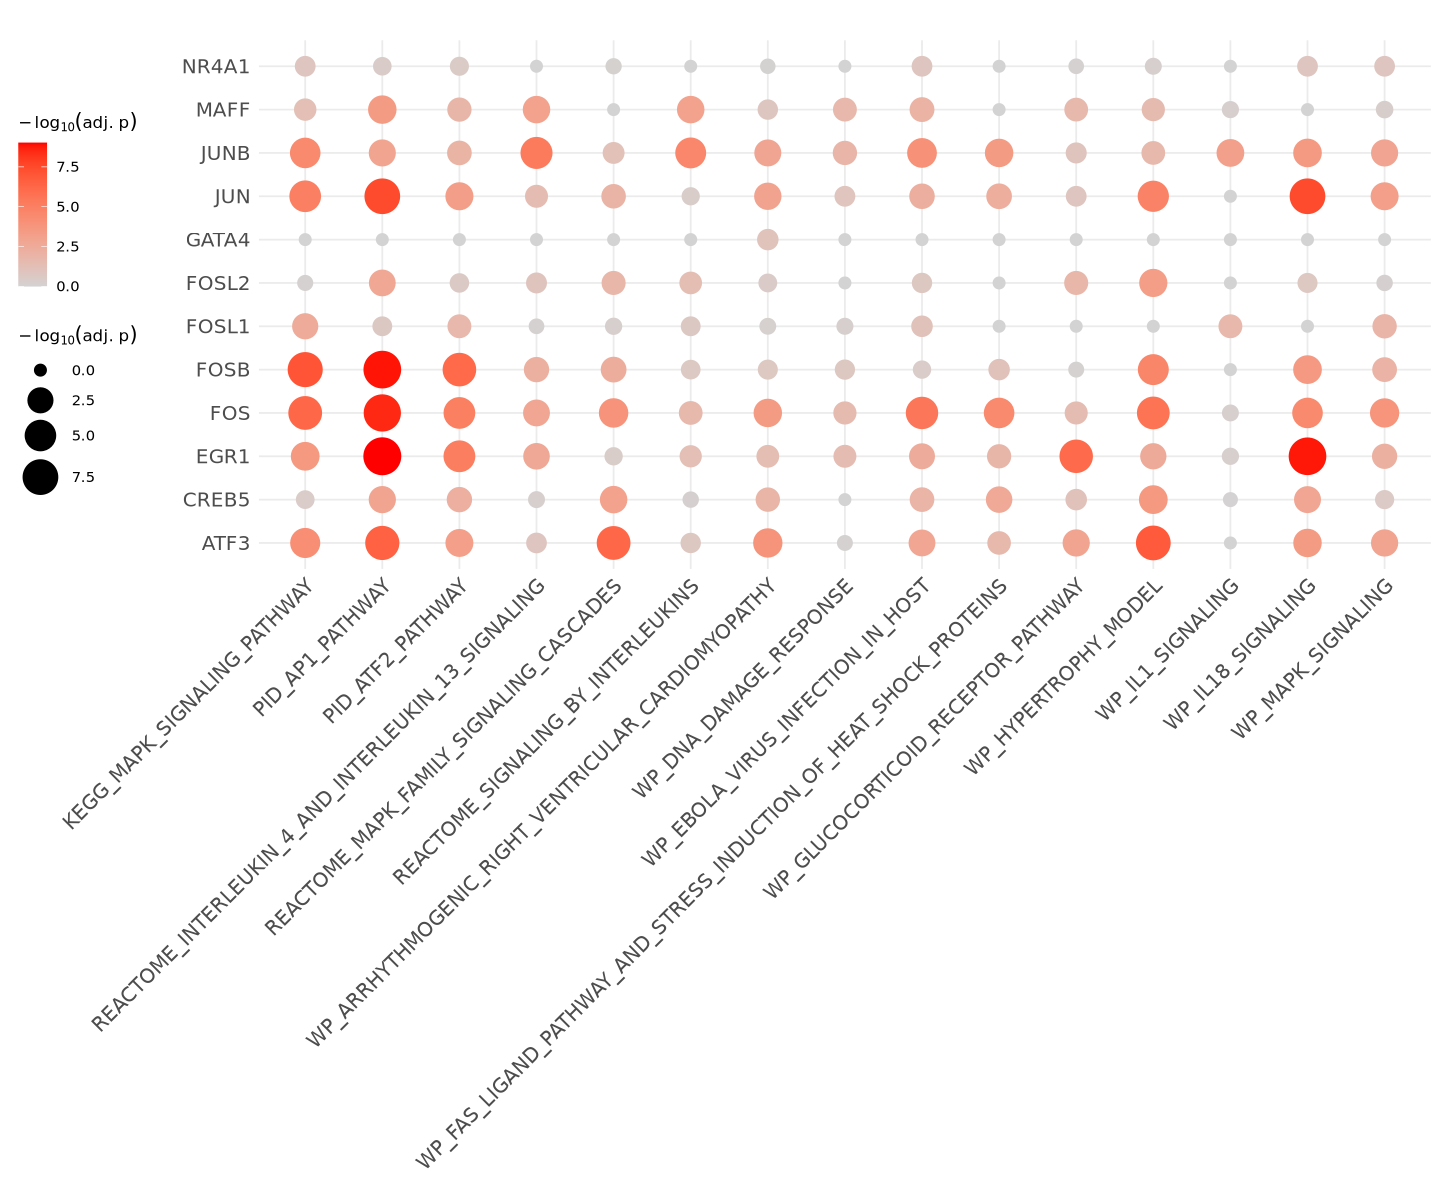

In [80]:
options(repr.plot.width=12, repr.plot.height=10)
gg

In [81]:
ggsave(filename = paste0("/nfs/lab/projects/mega_heart/Plots_figures/",
                          "GSEA_GRN_Hermes_Wide.pdf"),
                            width = 12, height = 10, 
                            plot = gg, device = "pdf")

In [82]:
# Compute negative log10 of adjusted p-value
df$neglog10_padj <- -log10(df$padj)

# Create the bubble plot
gg = ggplot(df, aes(x = Regulon, y = pathway)) +
  geom_point(aes(size = neglog10_padj, color = neglog10_padj)) +
  
  # Scale size of bubbles (adjust range to taste)
  scale_size_continuous(range = c(3, 10),
                        name = expression(-log[10](adj.~p))) +
  
  # Color gradient from light grey (low) to red (high)
  scale_color_gradient(low = "lightgrey", high = "red",
                       name = expression(-log[10](adj.~p))) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 10, face = "bold"),
    legend.position = "left"
  ) + 
  
  # Axis labels and title
  labs(
    x = "",
    y = "",
    title = ""
  )

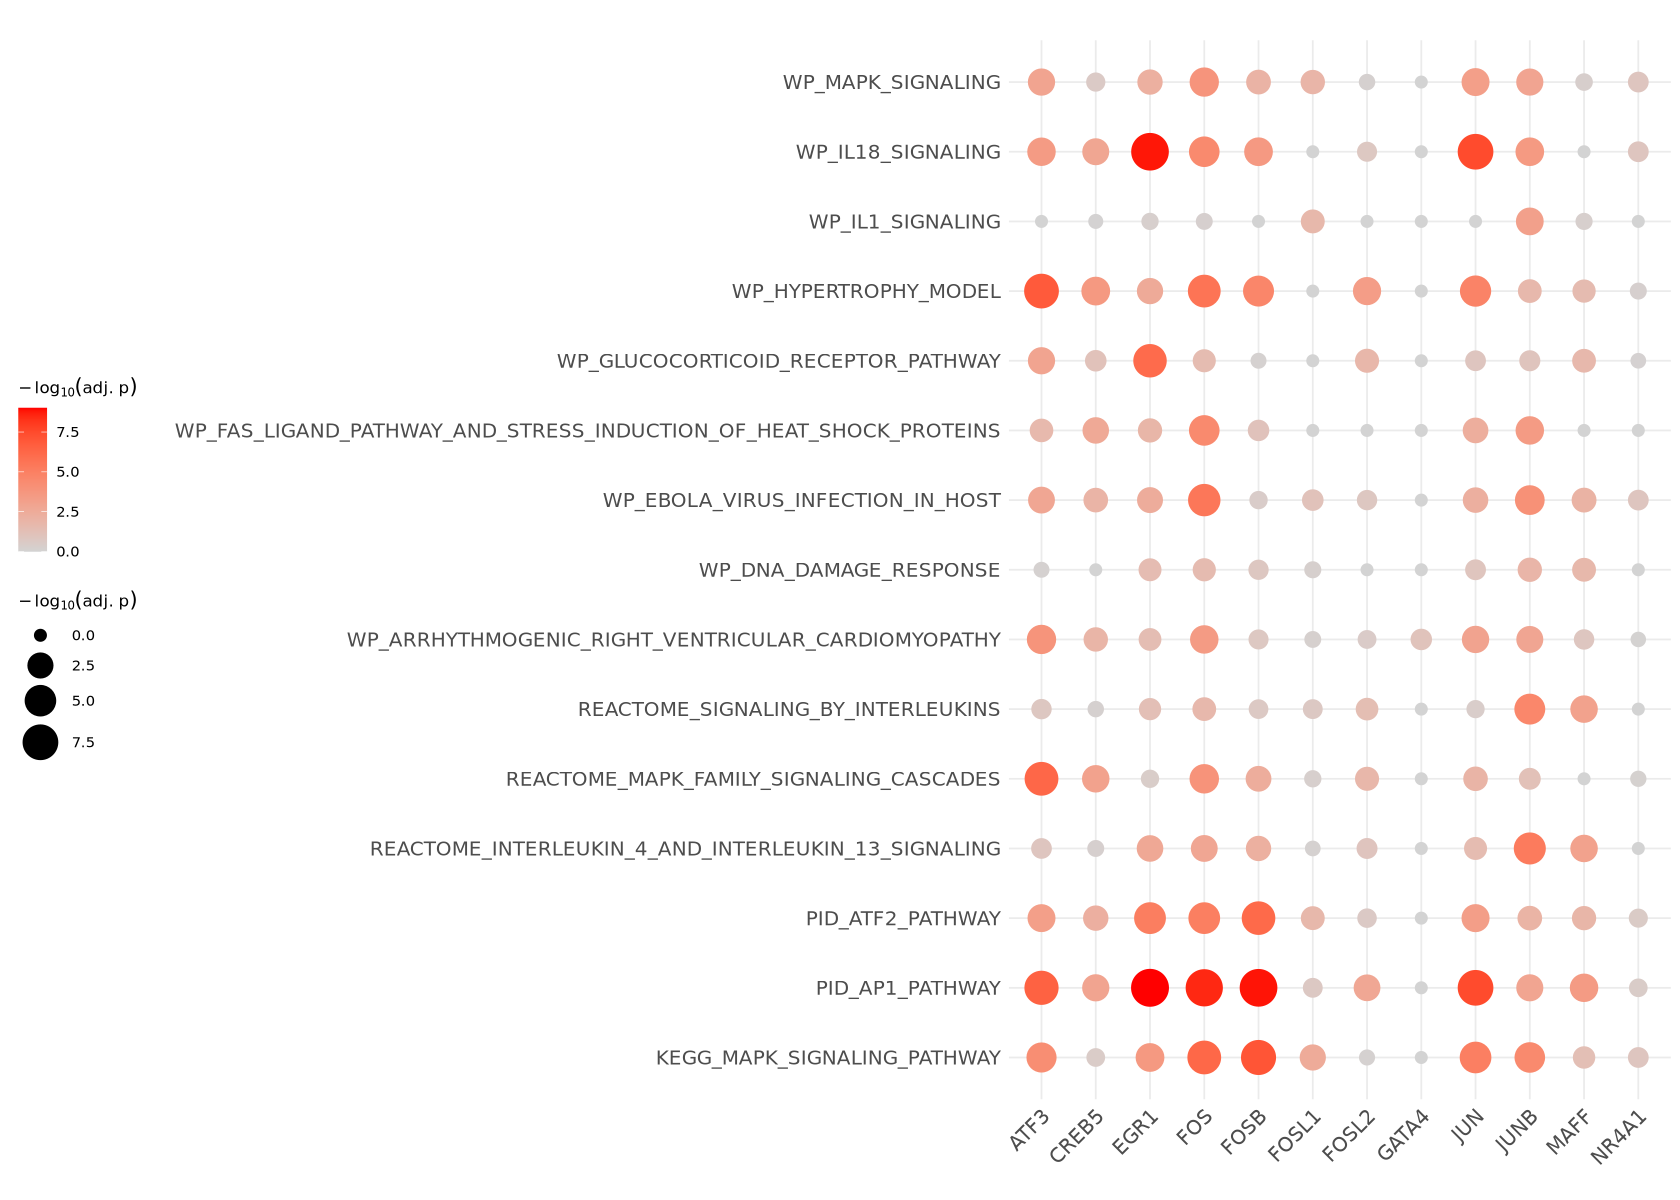

In [86]:
options(repr.plot.width=14, repr.plot.height=10)
gg

In [87]:
ggsave(filename = paste0("/nfs/lab/projects/mega_heart/Plots_figures/",
                          "GSEA_GRN_Hermes_long.pdf"),
                            width = 12, height = 10, 
                            plot = gg, device = "pdf")